                                                                                        Patricia Grau Francitorra
# Exploratory article analysis
## Objective
1. Get data from Wikipedia - analyse html format
2. UD tagging
3. Treebanks
4. Comparison
  - Problem: lining up data with same information.
    - Some files have a line for explanation: see first line of french article.
    - Info in two sentences contained in one; see French article.
    - Some articles do not even have the same sections.

In [1]:
import re
import requests
import json
import tempfile
from bs4 import BeautifulSoup
# format is shift alt f (in VSC)

### 1. Get data from Wikipedia

In [24]:
# Neat idea, but doesn't work with disambiguating urls, such as Jupiter
list_of_langs = ['en','sv' , 'ca', 'es', 'fr']
list_of_urls = [f'https://{lang}.wikipedia.org/wiki/Jupiter' for lang in list_of_langs]
list_of_urls

['https://en.wikipedia.org/wiki/Jupiter',
 'https://sv.wikipedia.org/wiki/Jupiter',
 'https://ca.wikipedia.org/wiki/Jupiter',
 'https://es.wikipedia.org/wiki/Jupiter',
 'https://fr.wikipedia.org/wiki/Jupiter']

In [3]:
eng_jup_url = 'https://en.wikipedia.org/wiki/Jupiter'
sv_jup_url = 'https://sv.wikipedia.org/wiki/Jupiter'
fr_jup_url = 'https://fr.wikipedia.org/wiki/Jupiter_(planète)' # disambiguation issue
spa_jup_url = 'https://es.wikipedia.org/wiki/Júpiter_(planeta)' # disambiguation issue
ca_jup_url = 'https://ca.wikipedia.org/wiki/Júpiter_(planeta)' # disambiguation issue

In [31]:
with open('jupiter/html_files/jupiter_en.html', 'w') as f:
    f.write(requests.get(url = eng_jup_url).text)
with open('jupiter/html_files/jupiter_spa.html', 'w') as g:
    g.write(requests.get(url = spa_jup_url).text)
with open('jupiter/html_files/jupiter_fr.html', 'w') as g:
    g.write(requests.get(url = fr_jup_url).text)

In [6]:
# r = requests.get(url = eng_jup_url)

# r = requests.get(eng_jup_url)
# data = r.json()
# starters = ['<p>', '</p><p>', '<title>', '<h']
# for alltext in r: #data:
#     texto = alltext.strip('\t')
#     if texto.startswith(tuple(starters)):# ('<p>') or texto.startswith('</p><p>'): # if '<p>' in texto or '</p>' in texto:
#         cleantext = BeautifulSoup(texto, "html.parser").text # when using "lxml" as the parser insead of html.parser, some paragraphs/lines are missing
#         cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
#         cleantext = cleantext.strip()
#         if len(cleantext) != 0:
#             print(cleantext)
#             print()

In [59]:
r = requests.post(url= eng_jup_url)
starters = ['<p>', '</p><p>', '<title>', '<h']
import tempfile

temp = tempfile.TemporaryFile(mode='w+t')

try:
    temp.writelines(r.text)
    
    for alltext in temp:
        print(alltext)
        texto = alltext.strip('\t')
        if texto.startswith(tuple(starters)):# ('<p>') or texto.startswith('</p><p>'): # if '<p>' in texto or '</p>' in texto:
            cleantext = BeautifulSoup(texto, "html.parser").text # when using "lxml" as the parser insead of html.parser, some paragraphs/lines are missing
            cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
            cleantext = cleantext.strip()
            if len(cleantext) != 0:
                print(cleantext)
                print()
finally:
    temp.close()

In [32]:
def print_cleantext(file):
    starters = ['<p>', '</p><p>', '<title>', '<h']
    f = open(file)
    # print(f.readlines())
    for alltext in f.readlines():
        texto = alltext.strip('\t')
        if texto.startswith(tuple(starters)):# ('<p>') or texto.startswith('</p><p>'): # if '<p>' in texto or '</p>' in texto:
            cleantext = BeautifulSoup(texto, "html.parser").text # when using "lxml" as the parser insead of html.parser, some paragraphs/lines are missing
            cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
            cleantext = cleantext.strip()
            if len(cleantext) != 0:
                print(cleantext)
                print()
    f.close()

In [10]:
#print_cleantext('jupiter/html_files/jupiter_en.html')

In [34]:
def save_cleantext(readfile, writefile):
    starters = ['<p>', '</p><p>', '<title>', '<h']
    f = open(readfile)
    with open(writefile, 'w') as g:
        for alltext in f.readlines():
            texto = alltext.strip('\t')
            if texto.startswith(tuple(starters)):
#             if texto.startswith('<p>') or texto.startswith('</p><p>'): # if '<p>' in texto or '</p>' in texto:
                cleantext = BeautifulSoup(texto, "html.parser").text # when using "lxml" as the parser insead of html.parser, some paragraphs/lines are missing
                cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
                cleantext = cleantext.strip()
                cleantext = cleantext.replace(u'\u200b', '')
                if len(cleantext) != 0:
                    g.write(cleantext + '\n')
    f.close()

In [35]:
save_cleantext('jupiter/html_files/jupiter_en.html', 'jupiter/cleantext/clean_jupiter_en.txt')
save_cleantext('jupiter/html_files/jupiter_spa.html', 'jupiter/cleantext/clean_jupiter_spa.txt')
save_cleantext('jupiter/html_files/jupiter_fr.html', 'jupiter/cleantext/clean_jupiter_fr.txt')

#### 1.2 Languages in the Wikipedia

In [18]:
def get_wiki_lang_codes():
    """
    Retrieves the language codes in Wikipedia
    Returns:
      - langugages: a dictionary containing
        the language code as the key and the
        language as the value.
    """
    url_languages = 'https://meta.wikimedia.org/wiki/List_of_Wikipedias'
    with tempfile.TemporaryFile(mode='w+t') as tmp:
        tmp.write(requests.get(url_languages).text)
        tmp.seek(0)
        languages = {}
        n = 0
        l = []
        for i, alltext in enumerate(tmp.readlines()):
            if i < 165 or i > 8484:
                continue
            if alltext.startswith('<td>'):
                texto = alltext.strip('\t')
                cleantext = BeautifulSoup(texto, "html.parser").text # when using "lxml" as the parser insead of html.parser, some paragraphs/lines are missing
#                 cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
#                 cleantext = re.sub('[()]', '', cleantext) # remove parenthesis
                cleantext = cleantext.strip()
                if len(cleantext) != 0:
                    if str(n).endswith('1'):
                        l.append(cleantext.lower())
                    elif str(n).endswith('2'):
                        if l[0] == 'norwegian bokmål':
                            l[0] = 'norwegian bokmaal'
                        elif l[0] == 'northern sami':
                            l[0] = 'north sami'
#                         languages[cleantext] = l[0]
                        languages[l[0]] = cleantext # other way around
                    else:
                        l = []
                    n += 1
    return languages

In [19]:
languages = get_wiki_lang_codes()

In [54]:
# languages

#### 1.3 Wikipedia articles written in the greatest number of languages

In [19]:
r = requests.get('https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_articles_written_in_the_greatest_number_of_languages')
articles = {}
for element in r.text.split('\n'):
    if element.startswith('<p>') or element.startswith('</p>'):
        if len(element.split(' ')) > 1:
            link = element.split(' ')[1][7:-1]
        text = BeautifulSoup(element, "html.parser").text
        if ':' in text:
            name, other = text.split(':')
            for e in other.split(' '):
                if e.isnumeric():
                    articles[name] = (int(e), link)
        else:
            words = text.split(' ')
            name = words[0]
            for e in words:
                if e.isnumeric():
                    articles[name] = (int(e), link)

In [55]:
# dict(sorted(articles.items(), key=lambda item: item[1], reverse = True))

### 2. UD tagging

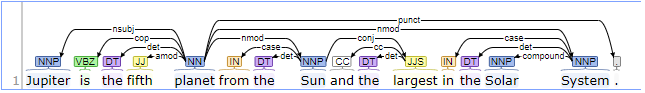
Example of what I want (from corenlp.run) -> in CONLLU format

In [14]:
# using stanza
import stanza
from stanza.utils.conll import CoNLL

In [45]:
# Getting first paragraph
list_of_clean_files = [('jupiter/clean_jupiter_en.txt', 'en'), ('jupiter/clean_jupiter_spa.txt', 'es'), ('jupiter/clean_jupiter_fr.txt', 'fr')]
for file, lang in list_of_clean_files:
    stanza.download(lang)
    nlp = stanza.Pipeline(lang)
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('J'): # First line talking about Jupiter
                doc = nlp(line)
                CoNLL.write_doc2conll(doc, f"jupiter/jup_{lang}.conllu")
                break

2022-01-25 15:42:20 INFO: Downloading default packages for language: en (English)...
2022-01-25 15:42:22 INFO: File exists: /home/gusgraupa@GU.GU.SE/stanza_resources/en/default.zip.
2022-01-25 15:42:30 INFO: Finished downloading models and saved to /home/gusgraupa@GU.GU.SE/stanza_resources.
2022-01-25 15:42:30 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2022-01-25 15:42:30 INFO: Use device: gpu
2022-01-25 15:42:30 INFO: Loading: tokenize
2022-01-25 15:42:30 INFO: Loading: pos
2022-01-25 15:42:32 INFO: Loading: lemma
2022-01-25 15:42:33 INFO: Loading: depparse
2022-01-25 15:42:35 INFO: Loading: sentiment
2022-01-25 15:42:38 INFO: Loading: constituency
2022-01-25 15:42:42 INFO: Loading: ner
2022-01-25 15:42:48 INFO: Don

2022-01-25 15:42:48 INFO: Downloading default packages for language: es (Spanish)...
2022-01-25 15:42:50 INFO: File exists: /home/gusgraupa@GU.GU.SE/stanza_resources/es/default.zip.
2022-01-25 15:42:59 INFO: Finished downloading models and saved to /home/gusgraupa@GU.GU.SE/stanza_resources.
2022-01-25 15:42:59 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |
| ner       | conll02 |

2022-01-25 15:42:59 INFO: Use device: gpu
2022-01-25 15:42:59 INFO: Loading: tokenize
2022-01-25 15:42:59 INFO: Loading: mwt
2022-01-25 15:42:59 INFO: Loading: pos
2022-01-25 15:43:01 INFO: Loading: lemma
2022-01-25 15:43:01 INFO: Loading: depparse
2022-01-25 15:43:06 INFO: Loading: ner
2022-01-25 15:43:17 INFO: Done loading processors!


2022-01-25 15:43:17 INFO: Downloading default packages for language: fr (French)...
2022-01-25 15:43:18 INFO: File exists: /home/gusgraupa@GU.GU.SE/stanza_resources/fr/default.zip.
2022-01-25 15:43:28 INFO: Finished downloading models and saved to /home/gusgraupa@GU.GU.SE/stanza_resources.
2022-01-25 15:43:28 INFO: Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |
| ner       | wikiner |

2022-01-25 15:43:28 INFO: Use device: gpu
2022-01-25 15:43:28 INFO: Loading: tokenize
2022-01-25 15:43:28 INFO: Loading: mwt
2022-01-25 15:43:28 INFO: Loading: pos
2022-01-25 15:43:32 INFO: Loading: lemma
2022-01-25 15:43:33 INFO: Loading: depparse
2022-01-25 15:43:36 INFO: Loading: ner
2022-01-25 15:43:45 INFO: Done loading processors!


### 2.1 UDPipe API

In [20]:
# Models
r = requests.get('http://lindat.mff.cuni.cz/services/udpipe/api/models')
data = json.loads(r.text)
models = {}
for i in data['models'].keys():
    if i.startswith('norwegian') or i.startswith('ancient-greek'):
        lang = '_'.join(i.split('-')[0:2])
    elif i.startswith('old-church'):
        lang = '_'.join(i.split('-')[0:3])  
    else:
        lang = i.split('-')[0]
    if lang in models:
        models[lang].append(i)
    else:
        models[lang] = [i]

In [21]:
models

{'afrikaans': ['afrikaans-afribooms-ud-2.6-200830',
  'afrikaans-afribooms-ud-2.5-191206',
  'afrikaans-afribooms-ud-2.4-190531'],
 'ancient_greek': ['ancient_greek-perseus-ud-2.6-200830',
  'ancient_greek-proiel-ud-2.6-200830',
  'ancient_greek-perseus-ud-2.5-191206',
  'ancient_greek-proiel-ud-2.5-191206',
  'ancient_greek-perseus-ud-2.4-190531',
  'ancient_greek-proiel-ud-2.4-190531',
  'ancient_greek-ud-2.0-170801',
  'ancient_greek-proiel-ud-2.0-170801',
  'ancient-greek-ud-1.2-160523',
  'ancient-greek-proiel-ud-1.2-160523'],
 'arabic': ['arabic-padt-ud-2.6-200830',
  'arabic-padt-ud-2.5-191206',
  'arabic-padt-ud-2.4-190531',
  'arabic-ud-2.0-170801',
  'arabic-ud-1.2-160523'],
 'armenian': ['armenian-armtdp-ud-2.6-200830',
  'armenian-armtdp-ud-2.5-191206',
  'armenian-armtdp-ud-2.4-190531'],
 'basque': ['basque-bdt-ud-2.6-200830',
  'basque-bdt-ud-2.5-191206',
  'basque-bdt-ud-2.4-190531',
  'basque-ud-2.0-170801',
  'basque-ud-1.2-160523'],
 'belarusian': ['belarusian-hse-ud-

In [22]:
# models.keys()
len(models.keys())

67

In [25]:
with open('udmodels.tmp', 'w') as f:
    f.write('\\begin{enumerate}' + '\n')
    for lang, model in models.items():
        if '_' in lang:
            lang = ' '.join(lang.split('_'))
        language = lang.title()
        f.write('\\item \\textbf{' + language + '} \n')
        f.write('\\begin{itemize} \n')
        for x in model:
            f.write('\\item ' + x + '\n')
        f.write('\\end{itemize} \n')
    f.write('\\end{enumerate}')

In [25]:
# getting CONLLU files with UDPipe 2 on Wikipedia
url = 'https://lindat.mff.cuni.cz/services/udpipe/api/process'
list_of_clean_files = [('jupiter/cleantext/clean_jupiter_en.txt', 'english'), ('jupiter/cleantext/clean_jupiter_spa.txt', 'spanish'), ('jupiter/cleantext/clean_jupiter_fr.txt', 'french')]
for (file, lang) in list_of_clean_files:
     with open(file, 'r') as f:
        for line in f:
            myobj = {'data' : line, 'model' : models[lang],'tokenizer' : '', 'tagger' : '', 'parser' : ''}
            x = requests.post(url, data = myobj)                
            # to use 'a', the text has to be erased before!
            with open(f"jupiter/parsed_with_UDPipe/jup_{lang}.conllu", "a") as g:
                g.write(json.loads(x.text)['result'])

In [21]:
# compare languages in Wikipedia with languages in UDPipe
# models are the languages that can be used in UDPipe
# languages are the languages in Wikipedia
both = []
nope = []
models_list = list(models.keys())
languages_list = list(languages.keys())
for model in models_list:
    name = ' '.join(model.split('_'))
    if name in languages_list:
        both.append(name)
    else:
        nope.append(name)

In [57]:
# We know that Chinese is the Wikipedia with a different name (chinese)
# norwegian bokmaal is also in the Wikipedia with an å instead of aa
# north sami is northern sami in the wikipedia
# both 

In [61]:
# Learning how to parse with UDpipe witjout creating extra files --> temp files
def udparsing(url, lang, name, path, model = models[lang][0]):
    with tempfile.TemporaryFile(mode='w+t') as tmp:
        tmp.write(requests.get(url).text)
        tmp.seek(0)
        starters = ['<p>', '</p><p>', '<title>', '<h']
        api_url = 'https://lindat.mff.cuni.cz/services/udpipe/api/process'
        with open(f'{path}{name}.conllu', 'w') as g:
            g.write(f'# {url}\n\n')
            for alltext in tmp.readlines():
                texto = alltext.strip('\t')
                if texto.startswith(tuple(starters)):
                    cleantext = BeautifulSoup(texto, "html.parser").text
                    cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
                    cleantext = cleantext.replace(u'\u200b', '') # remove this character
                    if len(cleantext) != 0:
                        myobj = {'data' : cleantext, 'model' : model,'tokenizer' : '', 'tagger' : '', 'parser' : ''}
                        x = requests.post(api_url, data = myobj)
                        g.write(json.loads(x.text)['result'])

In [62]:
udparsing('https://en.wikipedia.org/wiki/Russia', 'english', 'russia', './')

In [55]:
lang_in_states = []
with open('testing_the_script/states.html') as f:
    for line in f:
        if '<ul class="vector-menu-content-list"><li class="interlanguage-link interwiki' in line:
            for parts in line.split(' '):
                if parts.startswith('href='):
                    lang_in_states.append(parts[6:-1])

In [59]:
lang_in_states[3].split('//')[1].split('.')[0]

'af'

In [7]:
import os
link = 'wiki/United_States'
name = link.split('/')[1]
os.mkdir('attempt1')
dir_path = f'attempt1/{name}/'
os.mkdir(dir_path)

### Looking for square brackets

To see whether we should keep them or not. Update: we keep most of them!

In [32]:
def find_brac(lang):
    dictionary = {}
    with open('testing_scripts/square_brakets.txt', encoding="utf-8") as f:
        for line in f.readlines():
            if line.startswith(lang):
                res = re.findall('(\[.*?\])', line)
                for brac in res:
                    if brac in dictionary:
                        dictionary[brac] += 1
                    else:
                        dictionary[brac] = 1
    return dictionary

In [42]:
brackets_eng = find_brac('english')
brackets_esp = find_brac('spanish')
brackets_cat = find_brac('catalan')
brackets_fr = find_brac('french')
brackets_fin = find_brac('finnish')

In [36]:
{k: v for k, v in sorted(brackets_eng.items(), key=lambda item: item[1], reverse=True)}
# {k: v for k, v in sorted(brackets_esp.items(), key=lambda item: item[1], reverse=True)}
# {k: v for k, v in sorted(brackets_cat.items(), key=lambda item: item[1], reverse=True)}
# {k: v for k, v in sorted(brackets_fr.items(), key=lambda item: item[1], reverse=True)}
# {k: v for k, v in sorted(brackets_fin.items(), key=lambda item: item[1], reverse=True)}

{'[citation needed]': 157,
 '[update]': 124,
 '[page\xa0needed]': 23,
 '[better\xa0source\xa0needed]': 20,
 '[clarification needed]': 16,
 '[needs update]': 10,
 '[when?]': 9,
 '[unreliable source?]': 9,
 '[...]': 7,
 '[who?]': 7,
 '[…]': 7,
 '[failed verification]': 6,
 '[Ar]': 6,
 '[verification needed]': 5,
 '[Ne]': 5,
 '[Fe(CN)6]': 4,
 '[s]': 3,
 '[d]': 3,
 '[incomplete short citation]': 3,
 '[by whom?]': 3,
 '[which?]': 3,
 '[and]': 3,
 '[ʔiːˈɾɒːn]': 2,
 '[231]': 2,
 '[t]': 2,
 '[which]': 2,
 '[w]': 2,
 '[T]': 2,
 '[de]': 2,
 '[ing]': 2,
 '[excessive citations]': 2,
 '[neutrality is disputed]': 2,
 '[ref]': 2,
 '[ru]': 2,
 '[ɹ]': 2,
 '[Fe(H2O)6]': 2,
 '[Fe(NH3)6]': 2,
 '[AgF4]': 2,
 '[Ag(NH3)2]': 2,
 '[need quotation to verify]': 2,
 '[rɐˈsʲijə]': 1,
 '[roˈsia]': 1,
 '[iˈtaːlja]': 1,
 '[reˈpubblika itaˈljaːna]': 1,
 '[dubious  – discuss]': 1,
 '[circular reference]': 1,
 '[239]': 1,
 '[any further]': 1,
 '[p]': 1,
 '[I]': 1,
 '[vague]': 1,
 '[pʰ]': 1,
 '[p̚]': 1,
 '[ʔp]': 1,
 '[nɪ

### What articles do we have in which languages?

In [1]:
import os

languages = {}
list_of_dirs = os.listdir('data/')
print(f'There are {len(list_of_dirs)} directories')
print()

for directory in list_of_dirs:
    path = (f'data/{directory}')
    files = os.listdir(path)
    for f in files:
        lang = f.split('-')[1].split('.')[0]
        if lang in languages:
            languages[lang] += 1
        else:
            languages[lang] = 1
    print(f'There are {len(files)} files in {directory}.')

There are 62 directories

There are 57 files in Iran.
There are 58 files in Russia.
There are 58 files in Italy.
There are 58 files in United_States.
There are 58 files in Europe.
There are 58 files in Wikipedia.
There are 58 files in Asia.
There are 58 files in English_Language.
There are 58 files in Africa.
There are 57 files in India.
There are 58 files in Japan.
There are 57 files in United_Kingdom.
There are 57 files in China.
There are 58 files in Earth.
There are 58 files in Sun.
There are 57 files in Paris.
There are 57 files in South_Africa.
There are 58 files in Rome.
There are 58 files in Jesus.
There are 56 files in Bible.
There are 57 files in Islam.
There are 55 files in Barack_Obama.
There are 55 files in Moon.
There are 57 files in Iraq.
There are 56 files in Dog.
There are 56 files in Ghana.
There are 56 files in Christianity.
There are 57 files in South_America.
There are 57 files in Water.
There are 55 files in New_York_City.
There are 54 files in Internet.
There are

In [2]:
langandnum = {k: v for k, v in sorted(languages.items(), key=lambda item: item[1], reverse=True)}

In [16]:
f = open('langandnum.txt', 'w')
f.write('Language, Number of times used \n')
for k, v in langandnum.items():
    if '_' not in k:
        f.write('\\item ' + k.capitalize() + ': ' + str(v) + ' \n')
    else:
        f.write('\\item ')
        newname = k.split('_')
        for x in newname:
            f.write(x.capitalize())
            f.write(' ')
        f.write(f': {str(v)} \n')
f.close()

### Article lengths

In [1]:
# Checking article length
import os

article_lengths = {}
sentences_per_article = {}

list_of_dirs = os.listdir('data/')
for directory in list_of_dirs:
    dir_path = f'data/{directory}'
    files = os.listdir(dir_path)
    for file in files:
        lang = file.split('-')[1].split('.')[0]
        file_path = f'data/{directory}/{file}'
        f = open(file_path)
                    
        for line in f.readlines():
            if line[0].isdigit():
                length = line.split('\t')[0]
            elif line.startswith('\n'):
                if lang in article_lengths:
                    article_lengths[lang].append(int(length))
                else:
                    article_lengths[lang] = [int(length)]
            elif line.startswith('# sent_id ='):
                _, num = line[:-1].split(' = ')
        
        if lang in sentences_per_article:
            sentences_per_article[lang].append(int(num))
        else:
            sentences_per_article[lang] = [int(num)]
        
        f.close()

In [2]:
sentences_per_article

{'english': [777,
  635,
  931,
  666,
  555,
  574,
  339,
  611,
  444,
  533,
  437,
  770,
  727,
  438,
  553,
  752,
  580,
  700,
  668,
  483,
  528,
  569,
  519,
  720,
  319,
  581,
  640,
  624,
  543,
  847,
  482,
  303,
  409,
  560,
  625,
  455,
  484,
  448,
  444,
  466,
  527,
  593,
  831,
  759,
  469,
  378,
  426,
  677,
  598,
  272,
  610,
  531,
  507,
  1001,
  266,
  619,
  669,
  420,
  400,
  893,
  630,
  353],
 'afrikaans': [779,
  474,
  312,
  749,
  90,
  35,
  195,
  50,
  157,
  65,
  357,
  418,
  164,
  355,
  108,
  364,
  768,
  153,
  516,
  56,
  60,
  127,
  383,
  58,
  147,
  35,
  25,
  54,
  113,
  101,
  38,
  67,
  13,
  916,
  48,
  58,
  506,
  115,
  151,
  483,
  137,
  120,
  370,
  368,
  90,
  62,
  9,
  174,
  34,
  83,
  371,
  90,
  190,
  50,
  104,
  33,
  23,
  39,
  96,
  15,
  19,
  58],
 'arabic': [302,
  697,
  600,
  604,
  1146,
  258,
  151,
  112,
  285,
  590,
  432,
  515,
  402,
  386,
  509,
  346,
  124,
  224

In [28]:
sum(sentences_per_article['classical_chinese'])

6797

In [3]:
import numpy as np

average_sent_len = {}
total_number_sent = {}

for lang, lengths in article_lengths.items():
    average_sent_len[lang] = np.mean(lengths)
    total_number_sent[lang] = len(lengths)

In [4]:
average_num_sent = {}
for lang, num_sent in sentences_per_article.items():
    average_num_sent[lang] = np.mean(num_sent)

In [7]:
np.mean(list(average_num_sent.values()))

220.88072644439464

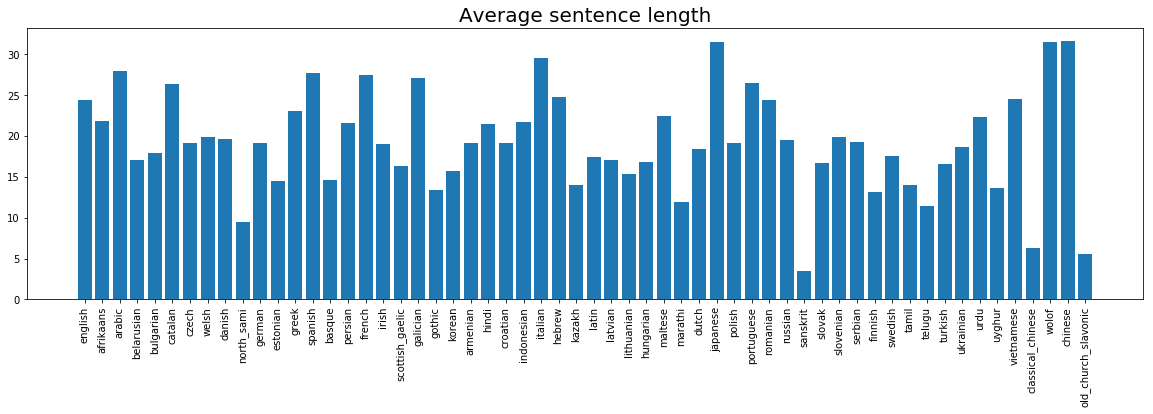

In [10]:
import matplotlib.pyplot as plt

languages_plot = list(average_sent_len.keys())
avg_sent_len = list(average_sent_len.values())

plt.bar(range(len(average_sent_len)), avg_sent_len, tick_label=languages_plot)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [20, 5]
plt.title('Average sentence length', fontsize=20)
plt.show()

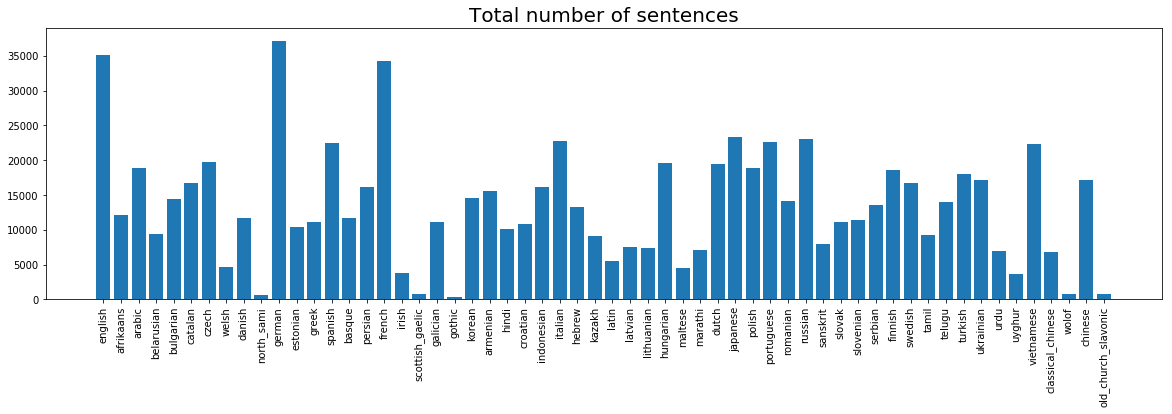

In [11]:
import matplotlib.pyplot as plt

languages_plot = list(total_number_sent.keys())
val_number_sent = list(total_number_sent.values())

plt.bar(range(len(total_number_sent)), val_number_sent, tick_label=languages_plot)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [20, 5]
plt.title('Total number of sentences', fontsize=20)
plt.show()

In [5]:
def no_underscores(text):
    if '_' in text:
        sep = text.split('_')
        cap = [x.capitalize() for x in sep]
        newtext = ' '.join(cap)
        return newtext
    else:
        return text.capitalize()

In [12]:
languages_plot = [no_underscores(x) for x in list(average_num_sent.keys())]
avg_number_sent = list(average_num_sent.values())
import pandas as pd
df = pd.DataFrame(avg_number_sent, index=languages_plot, columns = ['Average number of sentences'])
df.to_csv('averagenumberofsentences.csv', sep=',')
df

,Average number of sentences
English,567.225806
Afrikaans,196.741935
Arabic,303.790323
Belarusian,152.032258
Bulgarian,233.193548
Catalan,270.596774
Czech,317.983871
Welsh,75.790323
Danish,187.661290
North Sami,13.523810


In [27]:
new_sorted = [x for x in zip(languages_plot, avg_number_sent)]
new_sorted.sort(reverse=True)
new_sorted
with open ('histogram.tmp', 'w') as f:
    for x,y in new_sorted:
        f.write('(' + str(y) + ',' + str(x) +') ')
    for x, y in new_sorted:
        f.write(x + ', ')

In [15]:
import matplotlib
import matplotlib.pyplot as plt

languages_plot = [no_underscores(x) for x in list(average_num_sent.keys())]
avg_number_sent = list(average_num_sent.values())

plt.bar(range(len(average_num_sent)), avg_number_sent, tick_label=languages_plot)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [20, 5]
plt.title('Average number of sentences', fontsize=20)
plt.show()
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
# plt.savefig('averagenumberofsentences.pgf')

FileNotFoundError: [Errno 2] No such file or directory: 'dvipng'

<Figure size 1440x360 with 1 Axes>

In [13]:
{k: v for k, v in sorted(average_sent_len.items(), key=lambda item: item[1], reverse=True)}

{'chinese': 31.64673407717341,
 'japanese': 31.5063946276573,
 'wolof': 31.44864864864865,
 'italian': 29.479273015314206,
 'arabic': 27.926891425537562,
 'spanish': 27.628318189916264,
 'french': 27.49327996260153,
 'galician': 27.126794687724335,
 'portuguese': 26.45181493406254,
 'catalan': 26.39685283423735,
 'hebrew': 24.721911386662633,
 'vietnamese': 24.552938537460744,
 'english': 24.42188921747043,
 'romanian': 24.413423295454546,
 'greek': 23.07529603181777,
 'maltese': 22.44806654676259,
 'urdu': 22.31722958529286,
 'afrikaans': 21.832841449417938,
 'indonesian': 21.691413016580054,
 'persian': 21.554167697254513,
 'hindi': 21.504061014263076,
 'slovenian': 19.91484313208542,
 'welsh': 19.898489040221325,
 'danish': 19.56914482165879,
 'russian': 19.433659066232355,
 'serbian': 19.297853507413144,
 'polish': 19.16465160674515,
 'armenian': 19.131432233258572,
 'german': 19.112222401462603,
 'croatian': 19.104336664527366,
 'czech': 19.089322850621354,
 'irish': 18.9452697419

In [73]:
{k: v for k, v in sorted(total_number_sent.items(), key=lambda item: item[1], reverse=True)}

{'german': 37194,
 'english': 35168,
 'french': 34226,
 'japanese': 23379,
 'russian': 23025,
 'italian': 22724,
 'portuguese': 22673,
 'spanish': 22452,
 'vietnamese': 22290,
 'czech': 19715,
 'hungarian': 19667,
 'dutch': 19499,
 'polish': 18858,
 'arabic': 18835,
 'finnish': 18579,
 'turkish': 18012,
 'chinese': 17208,
 'ukrainian': 17176,
 'catalan': 16777,
 'swedish': 16726,
 'persian': 16172,
 'indonesian': 16164,
 'armenian': 15605,
 'korean': 14641,
 'bulgarian': 14458,
 'romanian': 14080,
 'telugu': 13987,
 'serbian': 13557,
 'hebrew': 13226,
 'afrikaans': 12198,
 'basque': 11691,
 'danish': 11635,
 'slovenian': 11379,
 'galician': 11144,
 'greek': 11063,
 'slovak': 11056,
 'croatian': 10907,
 'estonian': 10378,
 'hindi': 10096,
 'belarusian': 9426,
 'tamil': 9313,
 'kazakh': 9128,
 'sanskrit': 8028,
 'latvian': 7473,
 'lithuanian': 7435,
 'marathi': 7057,
 'urdu': 7017,
 'classical_chinese': 6797,
 'latin': 5570,
 'welsh': 4699,
 'maltese': 4448,
 'irish': 3837,
 'uyghur': 35

In [74]:
{k: v for k, v in sorted(average_num_sent.items(), key=lambda item: item[1], reverse=True)}

{'german': 599.9032258064516,
 'english': 567.2258064516129,
 'french': 552.0322580645161,
 'italian': 378.73333333333335,
 'japanese': 377.0806451612903,
 'russian': 371.3709677419355,
 'portuguese': 365.69354838709677,
 'spanish': 362.1290322580645,
 'vietnamese': 359.51612903225805,
 'czech': 317.98387096774195,
 'hungarian': 317.2096774193548,
 'dutch': 314.5,
 'polish': 304.16129032258067,
 'arabic': 303.7903225806452,
 'finnish': 299.66129032258067,
 'turkish': 290.51612903225805,
 'chinese': 277.5483870967742,
 'ukrainian': 277.03225806451616,
 'catalan': 270.5967741935484,
 'swedish': 269.7741935483871,
 'persian': 260.83870967741933,
 'indonesian': 260.7096774193548,
 'armenian': 251.69354838709677,
 'telugu': 237.0677966101695,
 'korean': 236.1451612903226,
 'bulgarian': 233.19354838709677,
 'romanian': 227.09677419354838,
 'serbian': 218.66129032258064,
 'hebrew': 213.32258064516128,
 'afrikaans': 196.74193548387098,
 'basque': 188.56451612903226,
 'danish': 187.661290322580

In [35]:
# gold standard sentence length
import os

gs_lengths = {}
sentences_per_gs = {}

list_of_files = ['gold_standard/simplified/simple_Russia_english_gold_standard.conllu', 'gold_standard/simplified/simple_Russia_spanish_gold_standard.conllu', 'gold_standard/simplified/simple_Russia_french_gold_standard.conllu']
for file in list_of_files:

    lang = file.split('/')[-1].split('_')[2]
    f = open(file)

    for line in f.readlines():
        if line[0].isdigit():
            length = line.split('\t')[0]
        elif line.startswith('\n') or line.startswith('\t\n'):
            if lang in gs_lengths:
                gs_lengths[lang].append(int(length))
            else:
                gs_lengths[lang] = [int(length)]
        elif line.startswith('# sent_id ='):
            _, num = line[:-1].split(' = ')

    sentences_per_gs[lang] = int(num)

    f.close()

In [37]:
sentences_per_gs

{'english': 25, 'spanish': 29, 'french': 24}

In [41]:
import numpy as np
for lang, sent in gs_lengths.items():
    print(lang, np.mean(sent))

english 23.88
spanish 30.896551724137932
french 31.416666666666668


### Joined languages

In [1]:
import os
joined_languages = {}
list_of_dirs = os.listdir('data/')

for directory in list_of_dirs:
    path = (f'data/{directory}')
    files = os.listdir(path)
    for f in files:
        lang = f.split('-')[1].split('.')[0]
        if lang in joined_languages:
            joined_languages[lang].append(f'{path}/{f}')
        else:
            joined_languages[lang] = [f'{path}/{f}']

In [13]:
with open('creating_shell_scripts/joined_languages.sh', 'w') as f:
    f.write('#! /bin/bash \n')
    f.write('function joined_lang { \n')
    for lang, paths in joined_languages.items():
        f.write('cat ')
        for i, path in enumerate(paths):
            if i == (len(paths)-1):
                f.write(f'{path} >> joined_by_lang/data_joined_by_lang/all_{lang}.conllu \n')
                f.write("grep . < " + f'joined_by_lang/data_joined_by_lang/all_{lang}.conllu' +" | grep -v '#'| awk '{print$4}' | sort | uniq -c | sort -nr >> " + f"joined_by_lang/results_joined_by_lang/{lang}_POS.txt \n")
            else:
                f.write(f'{path} ')
    f.write('} \n')
    f.write('joined_lang')

### Comparing same topic different language - per length

I should compare the files if they have a similar length, but I don't know what parameters to choose to group the articles by length (aka what lengths to separate the files at).

Decided to separate in:
- x < 20: XS
- 21 < x < 100: S
- 101 < x < 300: M
- 301 < x < 500: L
- x > 501: XL

In [26]:
# Let's start with one topic - Africa

import os
from file_read_backwards import FileReadBackwards

africa_lens = {}

list_of_Africa_files = os.listdir('data/Africa/')
for file in list_of_Africa_files:
    path = f'data/Africa/{file}'
    lang = file.split('-')[1].split('.')[0]
    with FileReadBackwards(path, encoding="utf-8") as frb:
        # getting lines by lines starting from the last line up
        for line in frb:
            if line.startswith('# sent_id ='):
                _, num = line.split(' = ')
                africa_lens[file] = int(num)
                break

In [27]:
# africa_lens
{k: v for k, v in sorted(africa_lens.items(), key=lambda item: item[1], reverse=True)}

{'Africa-french.conllu': 1222,
 'Africa-polish.conllu': 1081,
 'Africa-ukrainian.conllu': 965,
 'Africa-russian.conllu': 463,
 'Africa-english.conllu': 444,
 'Africa-basque.conllu': 436,
 'Africa-hindi.conllu': 372,
 'Africa-portuguese.conllu': 366,
 'Africa-japanese.conllu': 349,
 'Africa-hungarian.conllu': 323,
 'Africa-korean.conllu': 304,
 'Africa-turkish.conllu': 300,
 'Africa-german.conllu': 298,
 'Africa-czech.conllu': 288,
 'Africa-arabic.conllu': 285,
 'Africa-greek.conllu': 260,
 'Africa-italian.conllu': 260,
 'Africa-spanish.conllu': 259,
 'Africa-danish.conllu': 255,
 'Africa-sanskrit.conllu': 232,
 'Africa-romanian.conllu': 220,
 'Africa-croatian.conllu': 219,
 'Africa-vietnamese.conllu': 219,
 'Africa-catalan.conllu': 211,
 'Africa-bulgarian.conllu': 203,
 'Africa-belarusian.conllu': 189,
 'Africa-armenian.conllu': 175,
 'Africa-hebrew.conllu': 174,
 'Africa-finnish.conllu': 174,
 'Africa-latvian.conllu': 161,
 'Africa-swedish.conllu': 159,
 'Africa-afrikaans.conllu': 157

In [31]:
grouped_africa_lens = {'small' : [], 'G1' : [], 'G2' : [], 'G3' : [], 'G4' : [], 'G5': [], 'big' : []}
for file, num in africa_lens.items():
    if num <= 20:
        grouped_africa_lens['small'].append(file)
    elif num > 21 and num <= 100:
        grouped_africa_lens['G1'].append(file)
    elif num > 101 and num <= 300:
        grouped_africa_lens['G2'].append(file)
    elif num > 301 and num <= 500:
        grouped_africa_lens['G3'].append(file)
    elif num > 501 and num <= 700:
        grouped_africa_lens['G4'].append(file)
    elif num > 701 and num <= 900:
        grouped_africa_lens['G5'].append(file)
    else:
        grouped_africa_lens['big'].append(file)

# Did the same with Rice, Moon, Paris

In [32]:
# len(grouped_africa_lens['small']) # 6
# len(grouped_africa_lens['G1']) # 12
# len(grouped_africa_lens['G2']) # 27
# len(grouped_africa_lens['G3']) # 8
# len(grouped_africa_lens['G4']) # 0
# len(grouped_africa_lens['G5']) # 0
len(grouped_africa_lens['big']) # 5

3

In [33]:
grouped_africa_lens['big']

['Africa-french.conllu', 'Africa-polish.conllu', 'Africa-ukrainian.conllu']

In [68]:
# len(grouped_rice_lens['small']) # 9
# len(grouped_rice_lens['G1']) # 20
# len(grouped_rice_lens['G2']) # 18
# len(grouped_rice_lens['G3']) # 2
# len(grouped_rice_lens['G4']) # 1
# len(grouped_rice_lens['G5']) # 0
len(grouped_rice_lens['big']) # 1

1

In [86]:
# len(grouped_moon_lens['small']) # 3
# len(grouped_moon_lens['G1']) # 8
# len(grouped_moon_lens['G2']) # 19
# len(grouped_moon_lens['G3']) # 20
# len(grouped_moon_lens['G4']) # 4
# len(grouped_moon_lens['G5']) # 1
len(grouped_moon_lens['big']) # 0

0

In [77]:
len(grouped_paris_lens['small']) # 8
# len(grouped_paris_lens['G1']) # 7
# len(grouped_paris_lens['G2']) # 16
# len(grouped_paris_lens['G3']) # 17
# len(grouped_paris_lens['G4']) # 2
# len(grouped_paris_lens['G5']) # 3
# len(grouped_paris_lens['big']) # 4

8

In [20]:
import os
from itertools import combinations
from file_read_backwards import FileReadBackwards

list_of_dirs = os.listdir('data/')

files_per_topic = {}

for directory in list_of_dirs:
    dir_path = f'data/{directory}'
    files = os.listdir(dir_path)
    files_per_topic[directory] = {'XS' : [], 'S' : [], 'M' : [], 'L' : [], 'XL' : []}
    
    for file in files:
        lang = file.split('-')[1].split('.')[0]
        file_path = f'data/{directory}/{file}'
        with FileReadBackwards(file_path, encoding="utf-8") as frb:
        # getting lines by lines starting from the last line up
            for line in frb:
                if line.startswith('# sent_id ='):
                    _, num = line.split(' = ')
                    if int(num) <= 20:
                        files_per_topic[directory]['XS'].append(file_path)
                    elif int(num) <= 100 and int(num) > 20:
                        files_per_topic[directory]['S'].append(file_path)
                    elif int(num) <= 300 and int(num) > 100:
                        files_per_topic[directory]['M'].append(file_path)
                    elif int(num) <= 500 and int(num) > 101:
                        files_per_topic[directory]['L'].append(file_path)
                    else:
                        files_per_topic[directory]['XL'].append(file_path)
                    break

In [22]:
# files_per_topic

In [25]:
for topic, sep_dict in files_per_topic.items():
    with open(f'creating_shell_scripts/topic_scripts/{topic}.sh', 'w') as f:
        f.write('#! /bin/bash \n')
        f.write('function topic_combinations { \n')
        
        for size, files in sep_dict.items():
            comb = combinations(files, 2)
            for i in comb:
                file1 = i[0].split('/')[-1]
                file2 = i[1].split('/')[-1]
                title = f'echo {file1} {file2} >> cosine-sim-per-topic/{topic}-cosine-sim.txt ; \n'
                command = f'gfud cosine-similarity {i[0]} {i[1]} DEPREL >> cosine-sim-per-topic/{topic}-cosine-sim.txt ; \n'
                f.write(title)
                f.write(command)
        f.write('} \n')
        f.write('topic_combinations')

In [34]:
# I get Segmentation fault
with open('all_topics.sh', 'w') as f:
    f.write('#! /bin/bash \n')
    f.write('function topic_combinations { \n')
    for topic, sep_dict in files_per_topic.items():
        for size, files in sep_dict.items():
            comb = combinations(files, 2)
            for i in comb:
                file1 = i[0].split('/')[-1]
                file2 = i[1].split('/')[-1]
                title = f'echo {file1} {file2} >> cosine-sim-per-topic/{topic}-cosine-sim.txt ; \n'
                command = f'gfud cosine-similarity {i[0]} {i[1]} DEPREL >> cosine-sim-per-topic/{topic}-cosine-sim.txt ; \n'
                f.write(title)
                f.write(command)
    f.write('} \n')
    f.write('topic_combinations')

Update: let's compare all topics independently of the length of the article

In [6]:
import os
from itertools import combinations
from file_read_backwards import FileReadBackwards

list_of_dirs = os.listdir('data/')

for topic in list_of_dirs:
    dir_path = f'data/{topic}'
    files = os.listdir(dir_path)
    comb = combinations(files, 2)

    with open(f'creating_shell_scripts/topic_scripts/{topic}.sh', 'w') as f:
        f.write('#! /bin/bash \n')
        f.write('function topic_combinations { \n')
        for i in comb:
            title = f'echo {i[0]} {i[1]} >> cosine-sim-per-topic/{topic}-cosine-sim.txt ; \n'
            command = f'gfud cosine-similarity data/{topic}/{i[0]} data/{topic}/{i[1]} DEPREL >> cosine-sim-per-topic/{topic}-cosine-sim.txt ; \n'
            f.write(title)
            f.write(command)
        f.write('} \n')
        f.write('topic_combinations')

### Comparing different topic same language

Starting with English

In [5]:
import os
from itertools import permutations

list_of_dirs = os.listdir('data/')

english_files = []

for directory in list_of_dirs:
    dir_path = f'data/{directory}'
    files = os.listdir(dir_path)
    for file in files:
        lang = file.split('-')[1].split('.')[0]
        if lang == 'english':
            file_path = f'data/{directory}/{file}'
            english_files.append(file_path)

In [7]:
len(english_files)

62

In [20]:
perm = permutations(english_files, 2)
with open('english_files.txt', 'w') as f:
    for i in perm:
        title = 'echo ' + i[0].split('/')[-1] + ' ' + i[1].split('/')[-1] + ' >> english_cosine_sim.txt ;' + '\n'
        command = 'gfud cosine-similarity ' + i[0] + ' ' + i[1] + ' DEPREL >> english_cosine_sim.txt ;' + '\n'
        f.write(title)
        f.write(command)

All languages

In [1]:
import os
from itertools import permutations

list_of_dirs = os.listdir('data/')

files_per_lang = {}

for directory in list_of_dirs:
    dir_path = f'data/{directory}'
    files = os.listdir(dir_path)
    for file in files:
        lang = file.split('-')[1].split('.')[0]
        file_path = f'data/{directory}/{file}'
        if lang in files_per_lang:
            files_per_lang[lang].append(file_path)
        else:
            files_per_lang[lang] = [file_path]

In [7]:
with open('all_files.txt', 'w') as f:
    for lang, files in files_per_lang.items():
        perm = permutations(files, 2)
        for i in perm:
            title = 'echo ' + i[0].split('/')[-1] + ' ' + i[1].split('/')[-1] + f' >> cosine-sim-per-lang/{lang}-cosine_sim.txt ;' + '\n'
            command = 'gfud cosine-similarity ' + i[0] + ' ' + i[1] + f' DEPREL >> cosine-sim-per-lang/{lang}-cosine_sim.txt ;' + '\n'
            f.write(title)
            f.write(command)

In [5]:
for lang, files in files_per_lang.items():
    with open(f'creating_shell_scripts/{lang}_cosine_sim.sh', 'w') as f:
        f.write('#! /bin/bash \n')
        f.write(f'function {lang}_cosine_sim' + ' { \n')
        perm = permutations(files, 2)
        for i in perm:
            title = 'echo ' + i[0].split('/')[-1] + ' ' + i[1].split('/')[-1] + f' >> cosine-sim-per-lang/{lang}-cosine_sim.txt ;' + '\n'
            command = 'gfud cosine-similarity ' + i[0] + ' ' + i[1] + f' DEPREL >> cosine-sim-per-lang/{lang}-cosine_sim.txt ;' + '\n'
            f.write(title)
            f.write(command)
        f.write('} \n')
        f.write(f'{lang}_cosine_sim')

In [89]:
# I should have done it with combinations!
import os
from itertools import combinations

list_of_dirs = os.listdir('data/')

files_per_lang = {}

for directory in list_of_dirs:
    dir_path = f'data/{directory}'
    files = os.listdir(dir_path)
    for file in files:
        lang = file.split('-')[1].split('.')[0]
        file_path = f'data/{directory}/{file}'
        if lang in files_per_lang:
            files_per_lang[lang].append(file_path)
        else:
            files_per_lang[lang] = [file_path]

with open('all_combinations_per_lang.sh', 'w') as f:
    f.write('#! /bin/bash \n')
    f.write('function combinations { \n')
    for lang, files in files_per_lang.items():
        perm = combinations(files, 2)
        for i in perm:
            title = 'echo ' + i[0].split('/')[-1] + ' ' + i[1].split('/')[-1] + f' >> cosine-sim-per-lang-2/{lang}-cosine_sim.txt ;' + '\n'
            command = 'gfud cosine-similarity ' + i[0] + ' ' + i[1] + f' DEPREL >> cosine-sim-per-lang-2/{lang}-cosine_sim.txt ;' + '\n'
            f.write(title)
            f.write(command)
    f.write('} \n')
    f.write('combinations')

## Comparing Gold Standard and Parsed text

Since the evaluation function from GFUD does not work well with misalignments, let's try to make it better!

In [1]:
import copy

In [2]:
# different attempt, with dictionaries
gss = 'gold_standard/simplified/simple_Russia_spanish_gold_standard.conllu' # gold standard Spanish
uds = 'gold_standard/simplified/simple_Russia_spanish_intro_UDPipe.conllu' # UDpipe parsed text

def golddict(goldfile):
    """
    Returns the contents of a gold standard conllu
    file as a dictionary.

    Args:
      - goldfile: path to gold standard conllu file.

    Returns:
      - gold: a dictionary with sentences as keys and
        each parsed line as the values. 
      - gold_ids: a list of the sentences ids.
    """
    gold = {}
    gold_ids = []
    with open(goldfile, 'r') as f:
        document = f.readlines() + ['\n']
        for line in document:
            if line.startswith('# text ='):
                key = line[:-1]
                gold[key] = []
            elif line.startswith('# sent_id ='):
                gold_ids.append(line)
            elif line[0].isdigit() and key:
                gold[key].append(line[:-1])
            elif line.strip() == '':
                sentences = []
                for e in gold[key]:
                    text = e.split('\t')
                    sentences.append(text[:-2])
                gold[key] = sentences
                key = False
    return gold, gold_ids

In [3]:
gold, gold_ids = golddict(gss)

In [4]:
def rearrange_parsed(gold, parsedfile):
    """
    Rearranges the sentence parsing of a conllu file
    to match with the gold standard of the same text.

    Args:
      - gold: the output from golddict.
      - parsedfile: path to other conllu file in doubt.

    Returns:
      - parsed: a dictionary with the gold sentences as 
        keys and each parsed line as the values. 
      - bad_sentence_tokenization: a counter of the times
        a sentence has been badly split.
    """
    parsed = {}
    bad_sentence_tokenization = 0
    started = False
    
    with open(parsedfile, 'r') as g:
        document = g.readlines() + ['\n']
        for line in document:
            if line.startswith('#') and 'text' not in line:
                pass
            elif line.startswith('# text ='):
                if line[:-1] in gold:
                    key = line[:-1]
                    parsed[key] = []
                    correct = True # the sentence is separated correctly
                else: 
                    if started: # if this is not the beginning of the sentence
                        key = key + line[9:-1]
                        if key in gold:
                            parsed[key] = text
                            correct = True
                            started = False
                    else:
                        bad_sentence_tokenization += 1
                        correct = False # the sentence is separated incorrectly
                        started = True
                        key = line[:-1] # the beginning of the correct sentence
                        text = []
            else:
                if correct:
                    if line[0].isdigit() and key:
                        parsed[key].append(line[:-1])
                    if line.strip() == '':
                        sentences = []
                        for e in parsed[key]:
                            text = e.split('\t')
                            sentences.append(text[:-2])
                        parsed[key] = sentences
                        key = False
                else:
                    if line[0].isdigit():
                        text.append(line[:-1])
    
    return parsed, bad_sentence_tokenization

In [5]:
parsed, bad_sentence_tokenization = rearrange_parsed(gold, uds)

In [6]:
def writing(differences, goldwords, parsedline, gold_tok, list_of_extra_gold, list_of_extra_parsed, list_of_starters_gold, list_of_starters_parsed):
    """
    Writes differences in file.

    Args:
      - differences: list in which to save the differences.
      - goldwords: the analysed words per sentence of the gold standard. 
         Example:
         [['1', 'example1', '_', 'EX', '_', '_', '0', 'dep'],
          ['2', 'example2', '_', 'EX', '_', '_', '1', 'dep'], ...]
      - parsedline: every analysed words of the UD parsed words:
         Example:
         ['1', 'example1', '_', 'EX', '_', '_', '0', 'dep']
      - gold_tok:  a list containing the tokens of the sentence, based
         on the gold standard.
         Example:
         ['example1', 'example2', 'example3', ...]
      - list_of_extra_gold: list of integers counting missing 
        gold lines.
      - list_of_extra_parsed: list of integers counting missing 
        parsed lines.
      - list_of_starters_gold: list of numbers indicating missing
        gold lines.
      - list_of_starters_parsed: list of numbers indicating missing
        parsed lines.
    """
    goldline = goldwords[0]
    
    checking_parsed = parsedline[6]
    checking_gold = goldline[6]

    if checking_parsed != '_':
        if len(list_of_starters_parsed) > 0:
            checking_parsed = int(checking_parsed)
            for i, num in enumerate(list_of_starters_parsed):
                if i == (len(list_of_starters_parsed) - 1): # the last one
                    if checking_parsed > num:
                        checking_parsed += list_of_extra_parsed[-1]
                        break
                elif i == 0: # the first one
                    if checking_parsed <= num: # check first possibility
                        break
                    elif checking_parsed > num and checking_parsed <= list_of_starters_parsed[i+1]: # check second possibility
                        checking_parsed += list_of_extra_parsed[i]
                        break
                else:
                    if checking_parsed > num and checking_parsed <= list_of_starters_parsed[i+1]:
                        checking_parsed += list_of_extra_parsed[i]
                        break
        else:
            checking_parsed = int(checking_parsed)
        
    if checking_gold != '_':
        if len(list_of_starters_gold) > 0 and len(list_of_extra_gold) > 0:
            checking_gold = int(checking_gold)
            for i, num in enumerate(list_of_starters_gold):
                if i == (len(list_of_starters_gold) - 1): # the last one
                    if checking_gold > num:
                        checking_gold += list_of_extra_gold[-1]
                        break
                elif i == 0: # the first one
                    if checking_gold <= num: # check first possibility
                        break
                    elif checking_gold > num and checking_gold <= list_of_starters_gold[i+1]: # check second possibility
                        checking_gold += list_of_extra_gold[i]
                        break
                else:
                    if checking_gold > num and checking_gold <= list_of_starters_gold[i+1]:
                        checking_gold += list_of_extra_gold[i]
                        break
        else:
            checking_gold = int(checking_gold)
    
    if checking_parsed == checking_gold and parsedline[7] == goldline[7]:
        differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldline), '', '  '.join(parsedline)))

    elif checking_parsed == checking_gold and parsedline[7] != goldline[7]:
        differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldline), '|', '  '.join(parsedline)))

    elif checking_parsed != checking_gold and parsedline[7] == goldline[7]:
        differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldline), '|', '  '.join(parsedline)))

    else:
        differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldline), '|', '  '.join(parsedline)))
    del goldwords[0]
    del gold_tok[0]

In [94]:
def differences(inputgold, inputparsed, path, filename):
    """
    Writes in file the evaluation of the content of two 
    conllu files in dictionary form.

    Args:
      - inputgold: gold standard dictionary from golddict function.
      - gold_ids: a list of the sentence ids from the gold standard.
      - inputparsed: parsed dictionary from splitting function.
      - path: path in which to save the file.
      - filename: name of the evaluation file. 
    """

    gold = copy.deepcopy(inputgold)
    parsed = copy.deepcopy(inputparsed)
    to_dict = {}
    
    file = open(f'{path}{filename}', 'w')
    for sent_id, (sentence, goldwords) in zip(gold_ids, gold.items()): # goldwords is the sentence as in gold standard
        
        parsedwords = parsed[sentence] # parsedwords is the sentence as UDPipe parsed it
        gold_tok = [x[1] for x in goldwords] # sentence word forms
        n = 0 # counter for case 2
        parsed_lines = []
        list_of_starters_gold = [] 
        list_of_starters_parsed = [] # a list containing the numbers that guide when to add the extra elements
        list_of_extra_gold = []
        list_of_extra_parsed = []
        extra_gold = 0
        extra_parsed = 0
        
        differences = []
        max_gold = int(goldwords[-1][0])
        max_parsed = int(parsedwords[-1][0])
        
        for parsedline in parsedwords: # i. e. ['1', 'example1', '_', 'POS', '_', '_', '0', 'root']
            # Possible outcomes:
            # 1. words match
            # 2. the word has been split into more pieces in the parsing
            # 3. the word has not been split
            # 4. the word is not morhologically separed (example del > de el)
                 
            if gold_tok:
                if parsedline[1] == gold_tok[0]:
                    if '-' in goldwords[0][0] and '-' not in parsedline[0]: # case 4
                        numbers = goldwords[0][0].split('-')
                        times = int(numbers[-1]) - int(numbers[0]) + 1 # the number of tokens that make the goldword
                        list_of_starters_parsed.append(int(parsedline[0]))
                        extra_parsed += (int(numbers[-1]) - int(numbers[0]))
                        list_of_extra_parsed.append(extra_parsed)
                        writing(differences, goldwords, parsedline, gold_tok, list_of_extra_gold, list_of_extra_parsed, list_of_starters_gold, list_of_starters_parsed)
                        for _ in range(times):
                            differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldwords[0]), 'M', ' '*50)) 
                            del goldwords[0]
                            del gold_tok[0]
                    
                    else: # case 1
                        writing(differences, goldwords, parsedline, gold_tok, list_of_extra_gold, list_of_extra_parsed, list_of_starters_gold, list_of_starters_parsed)
                else: 
                    
                    join_gold = '' # case 3
                    join_gold_counter = 0
                    
                    for word in gold_tok:
                        if join_gold != parsedline[1]:
                            join_gold = join_gold + word
                            join_gold_counter += 1
                        else:
                            list_of_starters_parsed.append(int(parsedline[0]))
                            writing(differences, goldwords, parsedline, gold_tok, list_of_extra_gold, list_of_extra_parsed, list_of_starters_gold, list_of_starters_parsed)
                            extra_parsed += join_gold_counter - 1
                            list_of_extra_parsed.append(extra_parsed)

                            for i in range(join_gold_counter - 1): # i = 0, 1, 2, 3...
                                differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldwords[0]), 'M', ' '*50)) 
                                del goldwords[0]
                                del gold_tok[0]
                            break
                    
                    if join_gold != parsedline[1]: # case 2
                        n += 1
                        if n == 1:
                            join_parsed = parsedline[1] 
                            parsed_lines.append(parsedline) 
                            list_of_starters_gold.append(int(goldwords[0][0]))
                        else:
                            join_parsed = join_parsed + parsedline[1]
                            parsed_lines.append(parsedline) 

                        if join_parsed == gold_tok[0]:
                            for c, line in enumerate(parsed_lines):
                                if c == 0:
                                    writing(differences, goldwords, line, gold_tok, list_of_extra_gold, list_of_extra_parsed, list_of_starters_gold, list_of_starters_parsed)
                                else:
                                    extra_gold += c
                                    list_of_extra_gold.append(extra_gold)
                                    differences.append("{:<50}{:<5}{:<}\n".format(' '*50, 'M', '  '.join(line)))
                            n = 0
                            parsed_lines = []

            else:
                print('ERROR')
                differences.append("{:<50}{:<5}{:<}\n".format(' '*50, 'E', '  '.join(parsedline))) 
        
        # calculate UD scores
        maximum_length = max_gold if max_gold>= max_parsed else max_parsed
        numerator_score = copy.deepcopy(maximum_length)
        for line in differences:
            if '|' in line:
                numerator_score -= 1
        to_dict[sent_id] = (numerator_score/maximum_length, maximum_length, differences)
        
    # sort by score and write to_dict contents in file
    file = open(f'{path}{filename}', 'w')
    
    sorted_by_score = {k: v for k, v in sorted(to_dict.items(), key=lambda item: item[1])} #, reverse = True)}
    for sent_id, (score, maximum_length, differences) in sorted_by_score.items():
        file.write(sent_id)
        file.write(f'Score = {score}, TotalLength = {maximum_length}, PerfectMatch = {1 if score == 1 else 0} \n')
        for line in differences:
            file.write(line)
        file.write('\n')
        
    file.close()

In [95]:
fake_gold, fake_gold_ids = golddict('fake_gs.conllu')
fake_parsed, fake_bad_sentence_tokenization = rearrange_parsed(fake_gold, 'fake_parsed.conllu')

differences(gold, parsed, './', 'test.txt')

[5]
[1]


In [4]:
"""
The problem with using the number-token correspondance to check head alignment is that two words might have
the same form but not refer to the same element (head). In a very specific example talking about Matryoshka dolls:

A)
                 (head)
- GOLD STANDARD                            - PARSED (incorrect)
- 1  the     DET    2    det               - 1  the     DET    2    det
- 2  doll    NOUN   0    root              - 2  doll   NOUN    0    root
- 3  in      ADP    5    case              - 3  in      ADP    5    case
- 4  the     DET    5    det               - 4  the     DET    5    det
- 5  doll    NOUN   2    nmod              - 5  doll    NOUN   2    nmod
- 6  ,       PUNCT  9    punct             - 6  ,       PUNCT  9    punct
- 7  in      ADP    9    case              - 7  in      ADP    9    case
- 8  the     DET    9    det               - 8  the     DET    9    det
- 9  ugly    ADJ    10   amod              - 9  ugly    ADJ    10   nmod
- 10 one     NOUN   5    appos             - 10 one     NOUN   2    nmod 

The last token (10, "one") in both cases reffers to "doll", but to different words! So it would be marked as
correct, even though it is not. However, working with the heads can be very hard when there are missing elements,
such as this example:

B)

- GOLD STANDARD                            - PARSED
- 1     El      DET   2    det             - 1  el        DET   2    det
- 2     chico   NOUN  0    root            - 2  chico     NOUN  0    root
- 3-4   del                                - 3  del       ADP   4    case
- 3     de      ADP   5    case                     
- 4     el      DET   5    det                    
- 5     mercado NOUN  2    nmod            - 4  mercado   NOUN  2    nmod --> no change in head
- 6-7   del                                - 5  del       ADP   7    case
- 6     de      ADP   9    case
- 7     el      DET   9    det
- 8     otro    ADJ   9    amod            - 6  otro      ADJ   7    amod --> add 2
- 9     lado    NOUN  5    nmod            - 7  lado      NOUN  4    nmod --> add 1
- 10-11 del                                - 8  del       CASE  9    case
- 10    de      ADP   12   case
- 11    el      DET   12   det
- 12    valle   NOUN  9    nmod            - 9  valle     NOUN  7    nmod --> add 2
- 13    verde   ADJ   12   amod            - 10 verde     ADJ   9    amod --> add 3

It is not enough to add the number of missing lines to check for missalignments, because there are heads
which refer to words previous to the missing lines, which should not need to get number of lines added. 
Depending on what the head is refering to, we might need to add 1, 2, 3... to make the number align.
"""
print()

In [5]:
def writing(differences, goldwords, parsedline, gold_tok, gold_id_to_word, parsed_id_to_word):
    """
    Appends differences to list.
    Args:
      - differences: list in which to save the differences.
      - goldwords: the analysed words per sentence of the gold standard. 
         Example:
         [['1', 'example1', '_', 'EX', '_', '_', '0', 'dep'],
          ['2', 'example2', '_', 'EX', '_', '_', '1', 'dep'], ...]
      - parsedline: every analysed words of the UD parsed words:
         Example:
         ['1', 'example1', '_', 'EX', '_', '_', '0', 'dep']
      - gold_tok:  a list containing the tokens of the sentence, based
         on the gold standard.
         Example:
         ['example1', 'example2', 'example3', ...]
      - gold_id_to_word: dictionary mapping number to token for gold standard.
         Example:
         {'1' : 'example1', '2' : 'example2', ...}
      - parsed_id_to_word: dictionary mapping number to token for other file.
         Example:
         {'1' : 'example1', '2' : 'example2', ...}
    """
    goldline = goldwords[0]
    
    if parsedline[6] != '_':
        check_parsedline = parsed_id_to_word[parsedline[6]]
    else:
        check_parsedline = parsedline[6]
        
    if goldline[6] != '_':
        check_goldline = gold_id_to_word[goldline[6]]
    else:
        check_goldline = goldline[6]
    
    if check_parsedline == check_goldline and parsedline[7] == goldline[7]: # if refer to same word and same dep
        differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldline), '', '  '.join(parsedline)))

    elif check_parsedline == check_goldline and parsedline[7] != goldline[7]: # if refer to same word and diff dep
        differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldline), '|', '  '.join(parsedline))) # used to be D

    elif check_parsedline != check_goldline and parsedline[7] == goldline[7]: # if refer to diff word and same dep
        differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldline), '|', '  '.join(parsedline))) # used to be H

    else: # if refer to diff word and diff dep
        differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldline), '|', '  '.join(parsedline)))
    del goldwords[0]
    del gold_tok[0]

In [112]:
import copy
import sys
from unicodedata import category
import argparse

# fancy punctuation
chrs = (chr(i) for i in range(sys.maxunicode + 1))
noperiod = set(c for c in chrs if category(c).startswith("P"))
noperiod.remove('.')

def differences(inputgold, gold_ids, inputparsed, path, filename):
    """
    Writes in file the evaluation of the content of two 
    conllu files in dictionary form.
    Args:
      - inputgold: gold standard dictionary from golddict function.
      - gold_ids: a list of the sentence ids from the gold standard.
      - inputparsed: parsed dictionary from splitting function.
      - path: path in which to save the file.
      - filename: name of the evaluation file. 
    """

    gold = copy.deepcopy(inputgold)
    parsed = copy.deepcopy(inputparsed)
    to_dict = {}
    
    for sent_id, (sentence, goldwords) in zip(gold_ids, gold.items()): # goldwords is the sentence as in gold standard
        
        differences = []
        
        gold_id_to_word = {x[0]:x[1] for x in goldwords} # dict mapping number to token for gold standard
        gold_id_to_word['0'] = 'root'
        max_gold = int(goldwords[-1][0])
        
        parsedwords = parsed[sentence] # parsedwords is the sentence as UDPipe parsed it
        parsed_id_to_word = {x[0]:x[1] for x in parsedwords} # dict mapping number to token for other parsed doc
        parsed_id_to_word['0'] = 'root'
        max_parsed = int(parsedwords[-1][0])

        
        gold_tok = [x[1] for x in goldwords] # sentence word forms
        n = 0 # counter for case 2
        parsed_lines = []
        
        for parsedline in parsedwords: # i. e. ['1', 'exampl1', '_', 'POS', '_', '_', '0', 'root']
            # Possible outcomes:
            # 1. words match
            # 2. the word has been split into more pieces in the parsing
            # 3. the word has not been split
            # 4. the word is not morhologically separed (example del > de el)
                 
            if gold_tok:
                if parsedline[1] == gold_tok[0]:
                    if '-' in goldwords[0][0] and '-' not in parsedline[0]: # case 4
                        numbers = goldwords[0][0].split('-')
                        times = int(numbers[-1]) - int(numbers[0]) + 1 # the number of tokens that make the goldword
                        writing(differences, goldwords, parsedline, gold_tok, gold_id_to_word, parsed_id_to_word)
                        for i in range(times):
                            differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldwords[0]), 'M', ' '*50)) 
                            del goldwords[0]
                            del gold_tok[0]
                    
                    else: # case 1
                        writing(differences, goldwords, parsedline, gold_tok, gold_id_to_word, parsed_id_to_word)
                else: 
                    
                    join_gold = '' # case 3
                    join_gold_counter = 0
                    
                    for word in gold_tok:
                        if join_gold != parsedline[1]:
                            join_gold = join_gold + word
                            join_gold_counter += 1
                        else:
                            writing(differences, goldwords, parsedline, gold_tok, gold_id_to_word, parsed_id_to_word)
                            for i in range(join_gold_counter - 1): # i = 0, 1, 2, 3...
                                differences.append("{:<50}{:<5}{:<}\n".format('  '.join(goldwords[0]), 'M', ' '*50))
                                del goldwords[0]
                                del gold_tok[0]
                            break
                    
                    if join_gold != parsedline[1]: # case 2
                        n += 1
                        if n == 1:
                            join_parsed = parsedline[1]
                            parsed_lines.append(parsedline)
                        else:
                            join_parsed = join_parsed + parsedline[1]
                            parsed_lines.append(parsedline)

                        if join_parsed == gold_tok[0]:
                            for c, line in enumerate(parsed_lines):
                                if c == 0:
                                    writing(differences, goldwords, line, gold_tok, gold_id_to_word, parsed_id_to_word)
                                else:
                                    differences.append("{:<50}{:<5}{:<}\n".format(' '*50, 'M', '  '.join(line)))
                            n = 0
                            parsed_lines = []

            else:
                differences.append("{:<50}{:<5}{:<}\n".format(' '*50, 'E', '  '.join(parsedline)))
    
        # calculate UD scores
        maximum_length = max_gold if max_gold>= max_parsed else max_parsed
        numerator_score = copy.deepcopy(maximum_length)
        for line in differences:
            if '|' in line:
                numerator_score -= 1
        to_dict[sent_id] = (numerator_score/maximum_length, maximum_length, differences)
        
    # sort by score and write to_dict contents in file
    file = open(f'{path}{filename}', 'w')
    
    sorted_by_score = {k: v for k, v in sorted(to_dict.items(), key=lambda item: item[1])} #, reverse = True)}
    for sent_id, (score, maximum_length, differences) in sorted_by_score.items():
        
        file.write(sent_id)
        file.write(f'Score = {score}, TotalLength = {maximum_length}, PerfectMatch = {1 if score == 1 else 0} \n')
        for line in differences:
            file.write(line)
        file.write('\n')
    
    file.close()

In [113]:
differences(gold, gold_ids, parsed, './', 'test2.txt')

## Dependencies per lang

In [7]:
import os

list_of_files = os.listdir('joined_by_lang/data_joined_by_lang/')

with open('creating_shell_scripts/dependencies_per_lang.sh', 'w') as f:
    f.write('#! /bin/bash \n')
    f.write('function dependencies_per_lang { \n')
    for file in list_of_files:
        if file.endswith('.conllu'):
            lang = file[4:-7] 
            command = f"grep -v '#' joined_by_lang/data_joined_by_lang/{file} | grep . | awk '" + "{print $8}' | sort | uniq -c | sort -nr >>" + f"joined_by_lang/results_joined_by_lang/{lang}_dep.txt \n"
            f.write(command)
    f.write('} \n')
    f.write('dependencies_per_lang')

## Looking at evaluation

In [68]:
# looking at udScore
f = open('gold_standard/results_gfud/gfud_micro_las_english.txt', 'r')
evals = []
for line in f:
    if line.startswith('UDScore'):
        evals.append(float(line[19:].split(',')[0]))
f.close()

In [69]:
import numpy as np
np.mean(evals)

0.8073314287836648

In [63]:
# looking at udMatching
f = open('gold_standard/results_gfud/gfud_micro_las_english.txt', 'r')
numerator = []
denominator = []
for line in f:
    if line.startswith('UDScore'):
#         num = float(line[19:].split(',')[0]) # udScore
#         numerator.append(int(line.split(',')[1][14:])) # udMatching
        numerator.append(int(line.split(',')[3][17:])) # udSamesLength
        denominator.append(int(line.split(',')[2][17:])) #udTotalLength
#         matching.append(num/den)
f.close()

In [64]:
sum(numerator)/sum(denominator)

0.8297161936560935

In [65]:
sum(numerator)

497

In [66]:
sum(denominator)

599

In [37]:
s

'UDScore {udScore = 0.0, udMatching = 0, udTotalLength = 17, udSamesLength = 0, udPerfectMatch = 0}'

In [43]:
s.split(',')[3][17:]

'0'

## Looking at my evaluation

In [77]:
files = ['gold_standard/my_results/results_heads/las_english.txt', 'gold_standard/my_results/results_heads/las_french.txt', 'gold_standard/my_results/results_heads/las_spanish.txt']

for file in files:
    lang = file.split('/')[-1]
    scores = []
    f = open(file, 'r')

    for line in f:
        if line.startswith('Score'):
            scores.append(float(line[8:].split(',')[0]))
    f.close()
    print(lang, np.mean(scores))

las_english.txt 0.8801354221758934
las_french.txt 0.91925654431261
las_spanish.txt 0.8520438062201127


In [75]:
a = 'Score = 0.6875, TotalLength = 32, PerfectMatch = 0 '
a[8:].split(',')[0]

'0.6875'

In [ ]:
b = ''